# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

神经网络是模仿人类的大脑机制而发展出来的，先将数据进行线性拟合（kx+b），再计算激活函数（sigmoid等函数）转化为非线性拟合模型，以使预测输出更接近真实值，在计算分类问题时效果更好。

####  2. Why we use non-linear activation funcitons in neural networks?

如果使用线性函数作为激活函数，那么无论添加多少隐藏层，最后输出都能拟合成一个线性函数，那么就没有添加隐藏层的意义了。

#### 3. What is the 'Logistic Loss' ?

'Logistic Loss'和'Crossing Entropy Lossing'本质上是一样的，是'Crossing Entropy Lossing'在二分类问题(y1+y2=1)上的演化

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

c

#### 5. Why we don't use zero initialization for all parameters ?

当我们将w初始化为0时，所得到的预测值y^都是相同的，在进行反向传播梯度计算时，会导致权重w对称相等，部分参数得不到更新

#### 6. Can you implement the softmax function using python ? 

现在有些困难，还需继续学习

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [151]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [152]:
# Loading the data 
digits = datasets.load_digits()

print(digits.data.shape[0],digits.data.shape[1]) #图片数量，每张图片的维数

1797 64


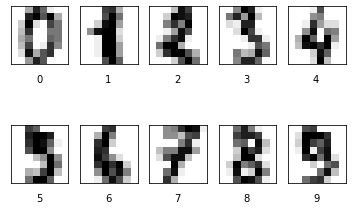

In [153]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [154]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [155]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [156]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1,1347)
y_test = y_test.reshape(1,450)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 1347)
(64, 450)
(1, 1347)
(1, 450)


#### 3- Architecture of the neural network

![title](./networks.png)

In [4]:
!pwd

/Users/limingxiao/Desktop/NLP_Lectures/jupyters_and_slides/2019-spring


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [157]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1. / (1. + np.exp(-1 * z))
    #s = 1 / (1 + e**(-1*z))
    return s

In [158]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [159]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    #初始化w/b
    w = np.zeros(shape = (dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [160]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1]
    
    #正向传播计算
    A = sigmoid(np.dot(w.T, X) + b)
    
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    #反向传播计算梯度
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [161]:
#初始化一些参数
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [166]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        #梯度更新
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [167]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    #计算预测值
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0 
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [168]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    
    w, b = initialize_parameters(X_train.shape[0])
    
    params, grads , costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    w, b = params['w'], params['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    d = {
        'costs': costs,
        'Y_prediction_test': Y_prediction_test,
        'Y_prediction_train': Y_prediction_train,
        'w': w,
        'b': b,
        'learning_rate': learning_rate,
        'num_iterations': num_iterations
    }
    
    return d

In [195]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 5000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.428140
Cost after iteration 200: 0.371503
Cost after iteration 300: 0.345188
Cost after iteration 400: 0.329215
Cost after iteration 500: 0.318204
Cost after iteration 600: 0.310046
Cost after iteration 700: 0.303718
Cost after iteration 800: 0.298653
Cost after iteration 900: 0.294503
Cost after iteration 1000: 0.291042
Cost after iteration 1100: 0.288114
Cost after iteration 1200: 0.285609
Cost after iteration 1300: 0.283444
Cost after iteration 1400: 0.281558
Cost after iteration 1500: 0.279902
Cost after iteration 1600: 0.278440
Cost after iteration 1700: 0.277141
Cost after iteration 1800: 0.275981
Cost after iteration 1900: 0.274941
Cost after iteration 2000: 0.274004
Cost after iteration 2100: 0.273157
Cost after iteration 2200: 0.272388
Cost after iteration 2300: 0.271688
Cost after iteration 2400: 0.271049
Cost after iteration 2500: 0.270463
Cost after iteration 2600: 0.269926
Cost after iteration 2700: 0.269431
Cost

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

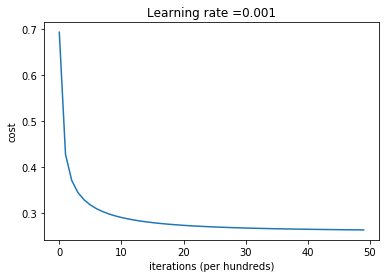

In [196]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
{'costs': [0.6931471805599453, 0.4241197785790109, 0.34577649895490375, 0.3227080180849899, 0.30857104327385637, 0.3004286283999801, 0.29570629586807984, 0.2926797346934324, 0.2905748910544518, 0.2890373746108629, 0.2878816733416273, 0.2869884635956996, 0.2862723038373455, 0.2856764275686939, 0.2851686642927675, 0.28473173816939046, 0.2843536989650756, 0.28402374629246674, 0.2837324466273346, 0.28347262692124187], 'Y_prediction_test': array([[0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 1., 0., 1., 1.

{'costs': [0.6931471805599453, 0.6306771676552809, 0.5839667190750502, 0.5481287279028103, 0.5199280010791499, 0.4972238106449735, 0.47857504974453646, 0.4629886893462069, 0.4497637281020838, 0.43839385858611085, 0.4285056549784128, 0.41981843813480596, 0.4121176163107185, 0.405236586789582, 0.39904419739035374, 0.3934358960822901, 0.3883273760511234, 0.3836499405195085, 0.37934707297994813, 0.37537186561098435], 'Y_prediction_test': array([[0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.

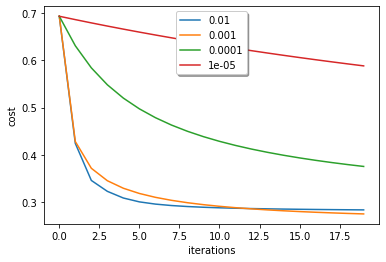

In [199]:
learning_rates = [0.01, 0.001, 0.0001,0.00001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = i, print_cost = False)
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    print(models[str(i)])

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('1')
plt.show()


##### 4.2 Observe the effect of iteration_num on the test accuracy.

iteration_num is: 2000
iteration_num is: 5000
iteration_num is: 8000
{'costs': [0.6931471805599453, 0.42814008747313764, 0.37150308583269703, 0.34518806614853037, 0.3292147724786352, 0.31820378375914327, 0.310045851206561, 0.30371825165674765, 0.2986527861341096, 0.29450274453832437, 0.291041727501395, 0.28811419071695454, 0.28560899411140644, 0.2834442205812589, 0.28155795562095437, 0.2799024227424207, 0.2784401080545757, 0.27714111598026614, 0.27598131535868753, 0.27494100910994157], 'Y_prediction_test': array([[0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 

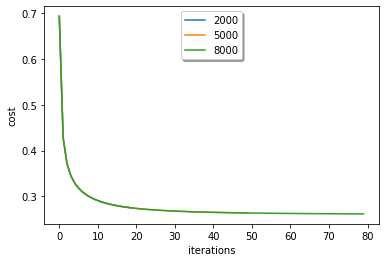

In [200]:
iteration_nums = [2000, 5000, 8000]
models = {}
for i in iteration_nums:
    print ("iteration_num is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations = i, learning_rate = 0.001, print_cost = False)
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["num_iterations"]))
for i in iteration_nums:
    print(models[str(i)])
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('1')
plt.show()

iteration_num的变化没有影响训练结果

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 